In [1]:
from models import Ferro, SK, Hopfield
import numpy as np
import openjij.cxxjij.system as S
import openjij.cxxjij.utility as U
import openjij.cxxjij.algorithm as A
%matplotlib inline
import matplotlib.pyplot as plt

# 強磁性モデル

In [15]:
N = 512
T_LIM = 30
S_LIM = 21
N_SMPL = 20000
ferro = Ferro(N, 1/N)

In [17]:
ferro_system = S.make_transverse_ising(ferro.gen_spin(), ferro, 1.0, 4)

temp_list = np.linspace(0.01, 2, T_LIM)
s_list = np.linspace(0, 1, S_LIM)

mm = np.zeros((S_LIM, T_LIM))

# 磁化とその分散を計算
for i, temp in enumerate(temp_list):
    schedule_list = U.make_transverse_field_schedule_list(1/temp, N_SMPL, S_LIM)
    
    mag, mag_std, spins = [], [], []
    idx = 0
    def callback_log(system, t):
        global mag, mag_std, spins, idx
        if idx % 200 == 199:
            spins.append([-1 if np.mean(s)<0 else 1 for s in system.trotter_spins[:-1]])
        if idx % N_SMPL == (N_SMPL-1):
            mag_list = [np.abs(np.mean(state)) for state in spins]
            mag_std.append(np.std(mag_list))
            mag.append(np.mean(mag_list))
            spins = []
        idx = idx + 1
    
    A.Algorithm_SingleSpinFlip_run(ferro_system, schedule_list, callback_log)
    mm[:, i] = mag

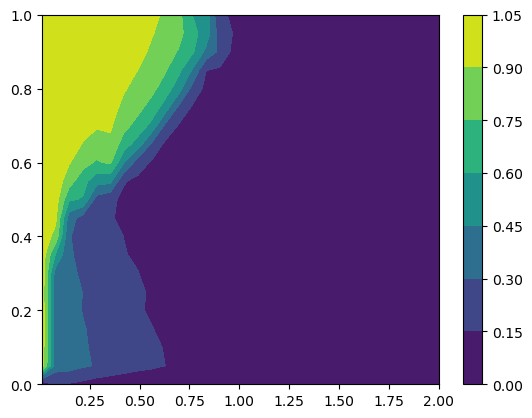

In [ ]:
TT, SS = np.meshgrid(temp_list, s_list)
c = plt.contourf(TT, SS, mm)
plt.colorbar(c)